In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 20)

In [2]:
terry_stops = pd.read_csv('./Terry_Stops.csv')


In [3]:
terry_stops.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,-,-1,20140000120677,92317,Arrest,None,7500,1984,M,Black or African American,Asian,Male,2015-10-16T00:00:00,11:32:00,-,-,-,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2
1,-,-1,20150000001463,28806,Field Contact,None,5670,1965,M,White,-,-,2015-03-19T00:00:00,07:59:00,-,-,-,NaN,N,N,-,-,-
2,-,-1,20150000001516,29599,Field Contact,None,4844,1961,M,White,White,Male,2015-03-21T00:00:00,19:12:00,-,-,-,NaN,N,-,-,-,-
3,-,-1,20150000001670,32260,Field Contact,None,7539,1963,M,White,-,-,2015-04-01T00:00:00,04:55:00,-,-,-,NaN,N,N,-,-,-
4,-,-1,20150000001739,33155,Field Contact,None,6973,1977,M,White,Black or African American,Male,2015-04-03T00:00:00,00:41:00,-,-,-,NaN,N,N,-,-,-


In [4]:
terry_stops.shape

(43496, 23)

In [5]:
terry_stops['Call Type'].value_counts() # xxx: what do we do with missing data?

911                              19166
-                                12828
ONVIEW                            8205
TELEPHONE OTHER, NOT 911          3017
ALARM CALL (NOT POLICE ALARM)      274
TEXT MESSAGE                         3
PROACTIVE (OFFICER INITIATED)        2
SCHEDULED EVENT (RECURRING)          1
Name: Call Type, dtype: int64

In [6]:
terry_stops['Subject Age Group'].value_counts()

26 - 35         14424
36 - 45          9140
18 - 25          8877
46 - 55          5595
56 and Above     2183
1 - 17           1906
-                1371
Name: Subject Age Group, dtype: int64

In [7]:
# target

terry_stops['Arrested'] = np.where(terry_stops['Stop Resolution'] == 'Arrest', 1, 0)

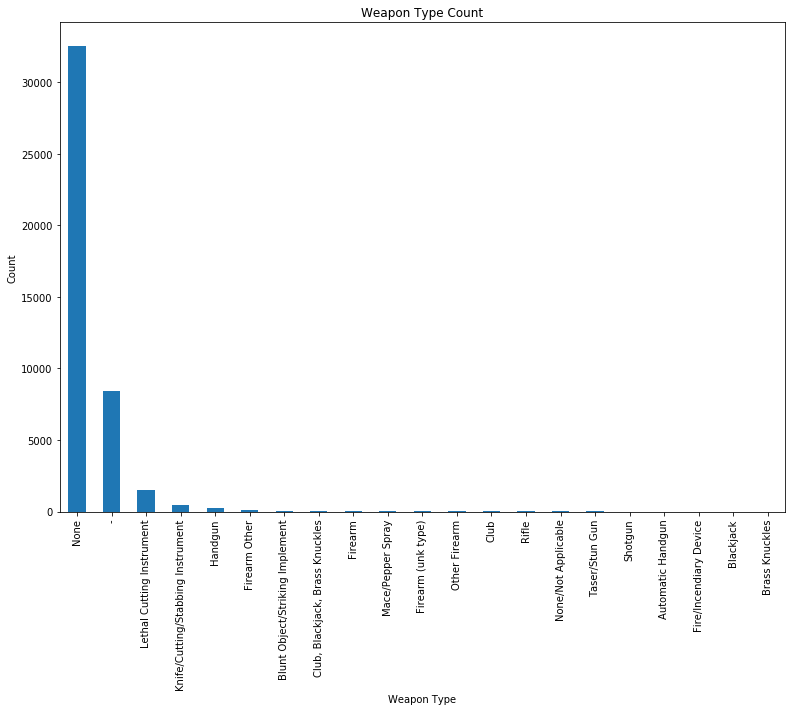

In [8]:
fig, ax = plt.subplots(figsize=(13, 9))

terry_stops['Weapon Type'].value_counts().plot(kind='bar')
ax.set_ylabel('Count')
ax.set_xlabel('Weapon Type')
ax.set_title('Weapon Type Count');


In [9]:
terry_stops['call_month'] = pd.to_datetime(terry_stops['Reported Date']).apply(lambda x: x.month)
terry_stops['call_hour'] = pd.to_datetime(terry_stops['Reported Time']).apply(lambda x: x.hour)


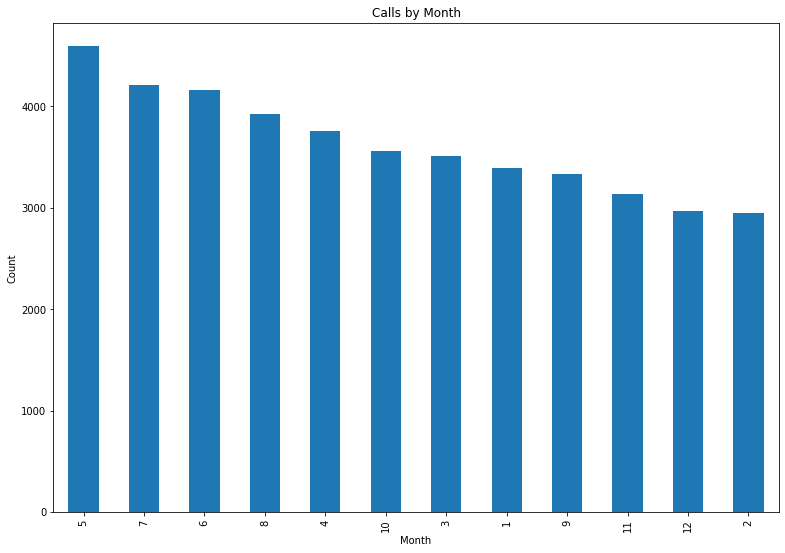

In [10]:
fig, ax = plt.subplots(figsize=(13, 9))

hours = terry_stops.call_hour.value_counts().plot(kind = 'bar')

hours = terry_stops.call_month.value_counts().plot(kind = 'bar')
terry_stops.groupby(pd.to_datetime(terry_stops['Reported Date']).dt.strftime('%B')).sum().sort_values(by='Reported Date')

ax.set_ylabel('Count')
ax.set_xlabel('Month')
ax.set_title('Calls by Month');

In [11]:
terry_stops.call_hour = pd.to_datetime(terry_stops['Reported Time']).apply(lambda x: x.hour)



# ts.groupby(ts.index.hour).mean()


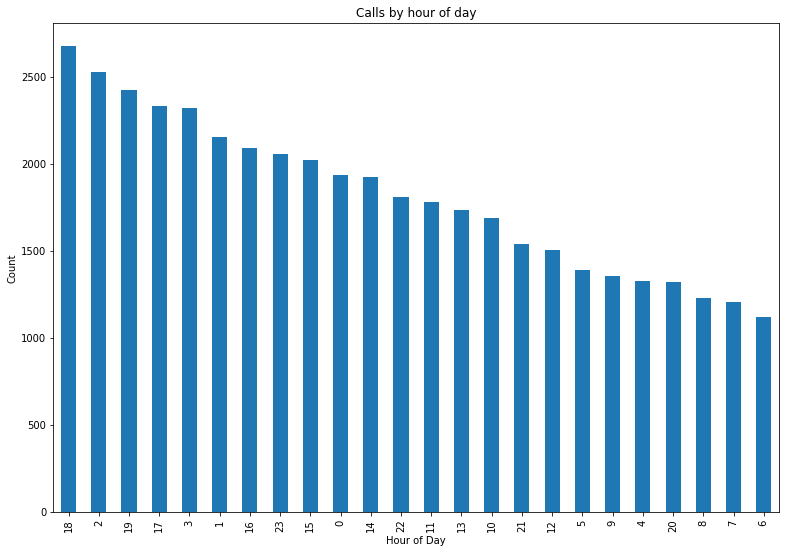

In [12]:
fig, ax = plt.subplots(figsize=(13, 9))

hours = terry_stops.call_hour.value_counts().plot(kind = 'bar')

ax.set_ylabel('Count')
ax.set_xlabel('Hour of Day')
ax.set_title('Calls by hour of day');


In [13]:
terry_stops['frisk_flag'] = np.where(terry_stops['Frisk Flag'] == 'Y', 1, 0)

frisk_flag                                     0     1
Subject Perceived Race                                
-                                           1264   398
American Indian or Alaska Native             997   281
Asian                                       1017   353
Black or African American                   9571  3401
Hispanic                                    1248   436
Multi-Racial                                 628   181
Native Hawaiian or Other Pacific Islander     28     8
Other                                        117    35
Unknown                                     1777   476
White                                      17271  4009


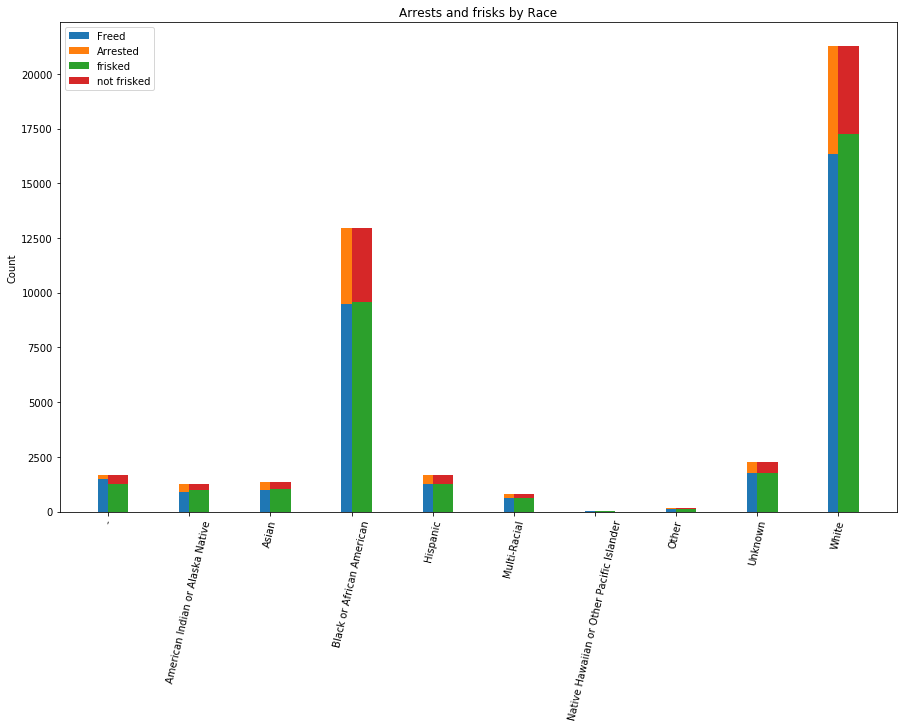

In [14]:
import seaborn as sns

plot_df = terry_stops.groupby('Subject Perceived Race')['Arrested'].value_counts().unstack(1)

cols = plot_df.index
freed = plot_df[0].values
arrested = plot_df[1].values

frisk_df = terry_stops.groupby('Subject Perceived Race').frisk_flag.value_counts().unstack(1)
frisked = frisk_df[0].values
not_frisked = frisk_df[1].values

print(frisk_df)

fig, ax = plt.subplots(figsize=(15, 9))
width = 0.25 
cols

ax.bar(cols, freed, width, align='center', bottom=0, label='Freed')  
ax.bar(cols, arrested, width, align='center', bottom=freed, label='Arrested')
ax.bar(cols, frisked, width, align='edge', bottom=0, label='frisked')
ax.bar(cols, not_frisked, width, align='edge', bottom=frisked, label='not frisked')

plt.xticks(rotation=77)
ax.set_ylabel('Count')
ax.set_title('Arrests and frisks by Race');
ax.legend();


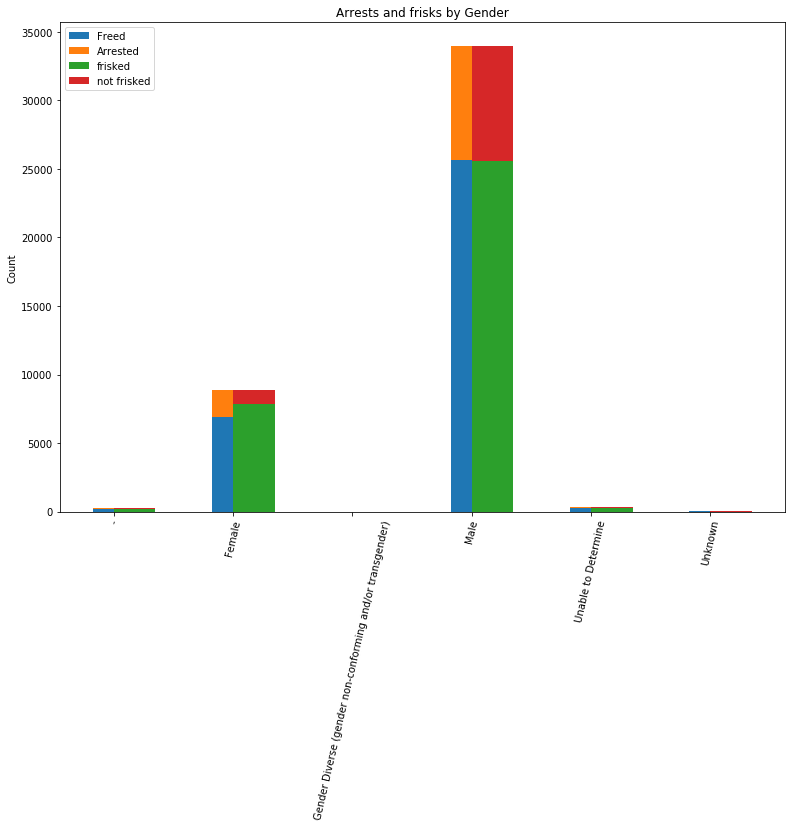

In [15]:
plot_df = terry_stops.groupby('Subject Perceived Gender')['Arrested'].value_counts().unstack(1)

frisk_df = terry_stops.groupby('Subject Perceived Gender').frisk_flag.value_counts().unstack(1)
frisked = frisk_df[0].values
not_frisked = frisk_df[1].values

cols = plot_df.index
freed = plot_df[0].values
arrested = plot_df[1].values

fig, ax = plt.subplots(figsize=(13, 9))
width = 0.35 
ax.bar(cols, freed, width, label='Freed')  
ax.bar(cols, arrested, width, bottom=freed, label='Arrested')
ax.bar(cols, frisked, width, align='edge', bottom=0, label='frisked')
ax.bar(cols, not_frisked, width, align='edge', bottom=frisked, label='not frisked')

plt.xticks(rotation=77)
ax.set_ylabel('Count')
ax.set_title('Arrests and frisks by Gender');
ax.legend()

## Data Cleaning


In [16]:
# Drop useless columns 

cols = ['Subject ID', 'Terry Stop ID', 'GO / SC Num', 'Officer ID', 'Stop Resolution']

df = terry_stops.drop(columns=cols, axis=1)

In [17]:
df.head()

,Subject Age Group,Weapon Type,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat,Arrested,call_month,call_hour,frisk_flag
0,-,None,1984,M,Black or African American,Asian,Male,2015-10-16T00:00:00,11:32:00,-,-,-,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2,1,10,11,0
1,-,None,1965,M,White,-,-,2015-03-19T00:00:00,07:59:00,-,-,-,NaN,N,N,-,-,-,0,3,7,0
2,-,None,1961,M,White,White,Male,2015-03-21T00:00:00,19:12:00,-,-,-,NaN,N,-,-,-,-,0,3,19,0
3,-,None,1963,M,White,-,-,2015-04-01T00:00:00,04:55:00,-,-,-,NaN,N,N,-,-,-,0,4,4,0
4,-,None,1977,M,White,Black or African American,Male,2015-04-03T00:00:00,00:41:00,-,-,-,NaN,N,N,-,-,-,0,4,0,0


In [18]:
# map true/false values

df['Arrest Flag'] = np.where(df['Arrest Flag'] == 'Y', 1, 0)
df['Frisk Flag'] = np.where(df['Frisk Flag'] == 'Y', 1, 0)

## Feature Engineering

In [19]:
df.dtypes

Subject Age Group    object
Weapon Type          object
Officer YOB           int64
Officer Gender       object
Officer Race         object
                      ...  
Beat                 object
Arrested              int64
call_month            int64
call_hour             int64
frisk_flag            int64
Length: 22, dtype: object

In [20]:
df['Officer Age'] = (pd.to_datetime(df['Reported Date']) - pd.to_datetime(df['Officer YOB'])).dt.days
df.drop('Officer YOB', inplace=True, axis=1)

In [21]:
df['Officer Age']

0        16723
1        16512
2        16514
3        16525
4        16527
         ...  
43491    18454
43492    18463
43493    18468
43494    18477
43495    18482
Name: Officer Age, Length: 43496, dtype: int64

In [22]:
# get useful time values

df['Reported Month'] = df['Reported Date'].apply(pd.to_datetime).dt.month
df['Reported Hour'] = df['Reported Time'].apply(pd.to_datetime).dt.hour

df.drop(['Reported Date', 'Reported Time'], axis=1, inplace=True)

In [23]:
# generate dummy variables on categorical data

df =  pd.get_dummies(df, columns=['Officer Race', 'Officer Gender', 'Subject Perceived Race', 
'Subject Perceived Gender', 'Weapon Type', 'Subject Age Group', 'Initial Call Type', 'Final Call Type', 
'Call Type', 'Officer Squad', 'Precinct', 'Sector', 'Beat'], drop_first=True) # xxx: how to deal with columns that are datetime?



In [24]:
df.shape

(43496, 737)

In [25]:
X = df.drop('Arrested', axis=1)
y = df.Arrested

np.nan_to_num(X)
np.nan_to_num(y)

array([1, 0, 0, ..., 1, 0, 0])

In [26]:
df.dtypes

Arrest Flag    int64
Frisk Flag     int64
Arrested       int64
call_month     int64
call_hour      int64
               ...  
Beat_W1        uint8
Beat_W2        uint8
Beat_W2        uint8
Beat_W3        uint8
Beat_W3        uint8
Length: 737, dtype: object

## Build Models

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)


In [28]:
X_train

,Arrest Flag,Frisk Flag,call_month,call_hour,frisk_flag,Officer Age,Reported Month,Reported Hour,Officer Race_Asian,Officer Race_Black or African American,Officer Race_Hispanic or Latino,Officer Race_Nat Hawaiian/Oth Pac Islander,Officer Race_Not Specified,Officer Race_Two or More Races,Officer Race_Unknown,Officer Race_White,Officer Gender_M,Officer Gender_N,Subject Perceived Race_American Indian or Alaska Native,Subject Perceived Race_Asian,Subject Perceived Race_Black or African American,Subject Perceived Race_Hispanic,Subject Perceived Race_Multi-Racial,Subject Perceived Race_Native Hawaiian or Other Pacific Islander,Subject Perceived Race_Other,Subject Perceived Race_Unknown,Subject Perceived Race_White,Subject Perceived Gender_Female,Subject Perceived Gender_Gender Diverse (gender non-conforming and/or transgender),Subject Perceived Gender_Male,Subject Perceived Gender_Unable to Determine,Subject Perceived Gender_Unknown,Weapon Type_Automatic Handgun,Weapon Type_Blackjack,Weapon Type_Blunt Object/Striking Implement,Weapon Type_Brass Knuckles,Weapon Type_Club,"Weapon Type_Club, Blackjack, Brass Knuckles",Weapon Type_Fire/Incendiary Device,Weapon Type_Firearm,Weapon Type_Firearm (unk type),Weapon Type_Firearm Other,Weapon Type_Handgun,Weapon Type_Knife/Cutting/Stabbing Instrument,Weapon Type_Lethal Cutting Instrument,Weapon Type_Mace/Pepper Spray,Weapon Type_None,Weapon Type_None/Not Applicable,Weapon Type_Other Firearm,Weapon Type_Rifle,Weapon Type_Shotgun,Weapon Type_Taser/Stun Gun,Subject Age Group_1 - 17,Subject Age Group_18 - 25,Subject Age Group_26 - 35,Subject Age Group_36 - 45,Subject Age Group_46 - 55,Subject Age Group_56 and Above,Initial Call Type_-ASSIGNED DUTY - FOOT BEAT (FROM ASSIGNED CAR),Initial Call Type_-ASSIGNED DUTY - STAKEOUT,"Initial Call Type_ALARM - ATM MACHINE, FREE STANDING",Initial Call Type_ALARM - AUDIBLE AUTOMOBILE (UNOCC/ANTI-THEFT),Initial Call Type_ALARM - BANK (HOLD-UP),"Initial Call Type_ALARM - COMM, HOLD-UP/PANIC (EXCEPT BANKS)","Initial Call Type_ALARM - COMM, SILENT/AUD BURG (INCL BANKS)","Initial Call Type_ALARM - RESIDENTIAL - BURGLARY, SILENT/AUDIBLE",Initial Call Type_ALARM - RESIDENTIAL - SILENT/AUD PANIC/DURESS,"Initial Call Type_ANIMAL - INJURED, DEAD HAZARD, OTHER",Initial Call Type_ANIMAL - IP/JO - BITE,"Initial Call Type_ANIMAL, REPORT - BITE",Initial Call Type_ARSON - IP/JO,Initial Call Type_ARSON - REPORT,Initial Call Type_ASLT - DV,Initial Call Type_ASLT - IP/JO - DV,Initial Call Type_ASLT - IP/JO - PERSON SHOT OR SHOT AT,Initial Call Type_ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),"Initial Call Type_ASLT - MOLESTED ADULT (GROPED, FONDLED, ETC.)",Initial Call Type_ASLT - PERSON SHOT OR SHOT AT,Initial Call Type_ASLT - WITH OR W/O WEAPONS (NO SHOOTINGS),Initial Call Type_ASSIST OTHER AGENCY - EMERGENCY SERVICE,Initial Call Type_ASSIST OTHER AGENCY - ROUTINE SERVICE,Initial Call Type_ASSIST PUBLIC - NO WELFARE CHK OR DV ORDER SERVICE,Initial Call Type_ASSIST SPD - ROUTINE SERVICE,Initial Call Type_ASSIST SPD - URGENT SERVICE,"Initial Call Type_AUTO - THEFT/LOSS, PLATES AND/OR TAB",Initial Call Type_AUTO RECOVERY,Initial Call Type_AUTO THEFT - VEH THEFT OR THEFT & RECOVERY,"Initial Call Type_AUTO THEFT-IP/JO - VEHICLE, PLATES, TABS",Initial Call Type_AWOL - ADULT OR JUVENILE,"Initial Call Type_BIAS -RACIAL, POLITICAL, SEXUAL MOTIVATION",Initial Call Type_BOMB THREATS - IP/JO,Initial Call Type_BURG - COMM BURGLARY (INCLUDES SCHOOLS),Initial Call Type_BURG - IP/JO - COMM BURG (INCLUDES SCHOOLS),Initial Call Type_BURG - IP/JO - RES (INCL UNOCC STRUCTURES),Initial Call Type_BURG - RES (INCL UNOCC STRUCTURES ON PROP),Initial Call Type_BURN - RECKLESS BURNING,Initial Call Type_CARJACKING - IP/JO - ROBBERY,Initial Call Type_CARJACKING - ROBBERY,Initial Call Type_CHILD - LURING,"Initial Call Type_CHILD - ABAND, ABUSED, MOLESTED, NEGLECTED","Initial Call Type_CHILD - IP/JO - ABAND, ABUSE, MOLEST, NEGLECT",Initial Call Type_CHILD - IP/JO - LURING,Initial Call Type_DEMONSTRATIONS,

In [29]:
#knn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

knn_preds = knn.predict(X_test)

knn_f1 = metrics.f1_score(y_test, knn_preds)

print(knn_f1)

0.14308426073131958


In [30]:
# logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced')

lr.fit(X_train, y_train)

lr_pred_train = lr.predict(X_train)

lr_preds = lr.predict(X_test)

lr_f1 = metrics.f1_score(y_test, lr_preds)

print(lr_f1)

/Users/koh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7437990078412547


In [31]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=5, class_weight='balanced')

dtc.fit(X_train, y_train)

dtc_preds  = dtc.predict(X_test)

dtc_f1 = metrics.f1_score(y_test, dtc_preds)

print(dtc_f1)

0.6238137416171075


In [32]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=4, class_weight='balanced')

dtc.fit(X_train, y_train)

dtc_preds  = dtc.predict(X_test)

dtc_f1 = metrics.f1_score(y_test, dtc_preds)

print(dtc_f1)


0.6005890639006274


In [33]:
# xgboost

import xgboost as xgb
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score

xg_clf = xgb.XGBClassifier(objective ='binary:logistic', 
                           colsample_bytree = 0.3, 
                           subsample = 0.5,
                           learning_rate = 0.1,
                           max_depth = 4, 
                           alpha = 1, 
                           n_estimators = 1000)


In [34]:
xg_clf.fit(X_train, y_train)


XGBClassifier(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.5, verbosity=1)

In [35]:
preds = xg_clf.predict(X_test)

test_f1 = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

Accuracy: 0.885415
F1: 0.754821


In [36]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic')

param_dist = {'learning_rate': [0.1, 0.25, 0.5, 0.75],
              'max_depth': [3,4,5], 
              'alpha': [0.25, 0.5, 1]
             }

In [37]:
from sklearn.model_selection import GridSearchCV

gsearch1 = GridSearchCV(
    estimator = clf_xgb,
    param_grid = param_dist, 
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    iid=False, 
    cv=5)

In [41]:
gsearch1.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 35.8min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 136.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid=False, n_jobs=-1,
             param_grid={'alpha': [0.25, 0.5, 1],
                         'learning_rate': [0.1, 0.25, 0.5, 0.75],
                         'max_depth': [3, 4, 5]},
    

In [42]:
gsearch1.best_params_

{'alpha': 0.25, 'learning_rate': 0.75, 'max_depth': 5}

In [43]:
gsearch1.best_score_ # xxx: explain auc

0.7373174806290443